# Hw3-2

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# extracting all data
DATA_NAME = 'lms_fun_v3.hdf5'
with h5py.File(DATA_NAME, 'r') as hf:
    print(list(hf.keys()))
    matched_10_v = hf['matched_10_v'][:]
    matched_10_x = hf['matched_10_x'][:]
    matched_10_y = hf['matched_10_y'][:]
    matched_10_z = hf['matched_10_z'][:]
    matched_3_v = hf['matched_3_v'][:]
    matched_3_x = hf['matched_3_x'][:]
    matched_3_y = hf['matched_3_y'][:]
    matched_3_z = hf['matched_3_z'][:]
    mismatched_v = hf['mismatched_v'][:]
    mismatched_x = hf['mismatched_x'][:]
    mismatched_y = hf['mismatched_y'][:]
    timevarying_coefficents = hf['timevarying_coefficents'][:]
    timevarying_v = hf['timevarying_v'][:]
    timevarying_x = hf['timevarying_x'][:]
    timevarying_y = hf['timevarying_y'][:]
    timevarying_z = hf['timevarying_z'][:]
    print(matched_10_z.shape)
    print(matched_10_v.shape)
    print(mismatched_v.shape)
    print(mismatched_x.shape)
    print(mismatched_y.shape)
    print(timevarying_v.shape)
    print(timevarying_coefficents.shape)
    print(timevarying_z.shape)

['matched_10_v', 'matched_10_x', 'matched_10_y', 'matched_10_z', 'matched_3_v', 'matched_3_x', 'matched_3_y', 'matched_3_z', 'mismatched_v', 'mismatched_x', 'mismatched_y', 'timevarying_coefficents', 'timevarying_v', 'timevarying_x', 'timevarying_y', 'timevarying_z']
(600, 501)
(600, 501, 3)
(600, 501, 3)
(600, 501)
(600, 501)
(501, 3)
(501, 3)
(501,)


In [3]:
print(matched_10_z[0][500])

0.46141811394230425


# 3-2-a

In [4]:
def LMS(v,z,step):
    w = np.zeros((501,3))
    err = np.zeros((501))
    z_head=np.zeros((501))
    for i in range(1, 501):
        z_head[i - 1] = np.sum(w[i - 1, :] * v[i - 1, :])
        err[i - 1] = z[i - 1] - z_head[i - 1]
        w[i] = w[i - 1] + step * err[i - 1] * v[i - 1]
    err[500]=z[500]-w[500,:]@v[500,:]
    return w, np.square(err)

# 3-2-b

In [5]:
step=0.05
step2=0.15
w_10_05=np.zeros((600,501,3))
w_10_15=np.zeros((600,501,3))
w_3_05=np.zeros((600,501,3))
w_3_15=np.zeros((600,501,3))
err_10_05=np.zeros((600,501))
err_10_15=np.zeros((600,501))
err_3_05=np.zeros((600,501))
err_3_15=np.zeros((600,501))

In [6]:
for i in range(600):
    w_10_05[i],err_10_05[i]=LMS(matched_10_v[i],matched_10_z[i],step)
    w_10_15[i],err_10_15[i]=LMS(matched_10_v[i],matched_10_z[i],step2)
    w_3_05[i],err_3_05[i]=LMS(matched_3_v[i],matched_3_z[i],step)
    w_3_15[i],err_3_15[i]=LMS(matched_3_v[i],matched_3_z[i],step2)

0.11055870803508275
0.13019086476819405
0.6035072015650056
0.7425955944615498


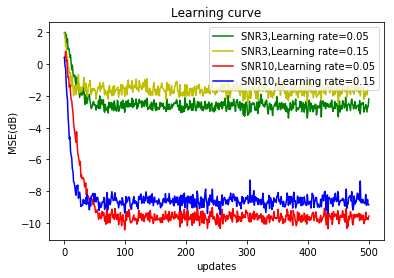

In [11]:
err_10_05_average=10*np.log10(np.average(err_10_05,axis=0))
err_10_15_average=10*np.log10(np.average(err_10_15,axis=0))
err_3_05_average=10*np.log10(np.average(err_3_05,axis=0))
err_3_15_average=10*np.log10(np.average(err_3_15,axis=0))
plt.figure()
plt.plot(err_3_05_average,c='g',label='SNR3,Learning rate=0.05')
plt.plot(err_3_15_average,c='y',label='SNR3,Learning rate=0.15')
plt.plot(err_10_05_average,c='r',label='SNR10,Learning rate=0.05')
plt.plot(err_10_15_average,c='b',label='SNR10,Learning rate=0.15')
plt.xlabel('updates')
plt.ylabel('MSE(dB)')
plt.legend()
plt.title('Learning curve')
print(np.average(err_10_05,axis=0)[-1])
print(np.average(err_10_15,axis=0)[-1])
print(np.average(err_3_05,axis=0)[-1])
print(np.average(err_3_15,axis=0)[-1])

# 3-2-c

The MSE of SNR which equal to 10,is a little higher than LMMSE.For LMS,they are 0.11 and 0.13 for learning rate equal to 0.05 and 0.15.
The MSE of SNR which equal to 3,is higher than LMMSE.For LMS,they are 0.60 and 0.74 for learning rate equal to 0.05 and 0.15.

# 3-2-d

Text(0.5,1,'Learning curve')

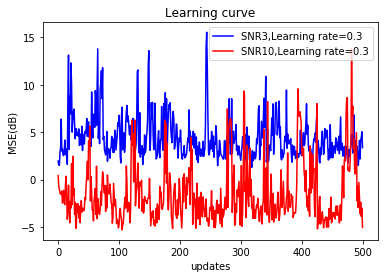

In [12]:
step3= 0.3
w_10=np.zeros((600,501,3))
err_10=np.zeros((600,501))
w_3=np.zeros((600,501,3))
err_3=np.zeros((600,501))

for i in range(600):
    w_10[i],err_10[i]=LMS(matched_10_v[i],matched_10_z[i],step3)
    w_3[i],err_3[i]=LMS(matched_3_v[i],matched_3_z[i],step3)

err_10_average=10*np.log10(np.average(err_10,axis=0))
err_3_average=10*np.log10(np.average(err_3,axis=0))
plt.figure()
plt.plot(err_3_average,c='b',label='SNR3,Learning rate=0.3')
plt.plot(err_10_average,c='r',label='SNR10,Learning rate=0.3')
plt.xlabel('updates')
plt.ylabel('MSE(dB)')
plt.legend()
plt.title('Learning curve')

Text(0.5,1,'Learning curve')

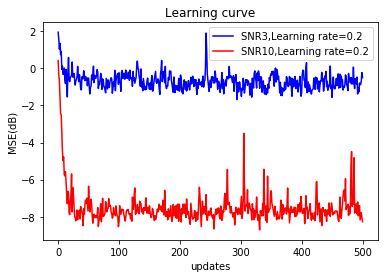

In [13]:
step3= 0.2
w_10=np.zeros((600,501,3))
err_10=np.zeros((600,501))
w_3=np.zeros((600,501,3))
err_3=np.zeros((600,501))
for i in range(600):
    w_10[i],err_10[i]=LMS(matched_10_v[i],matched_10_z[i],step3)
    w_3[i],err_3[i]=LMS(matched_3_v[i],matched_3_z[i],step3)
err_10_average=10*np.log10(np.average(err_10,axis=0))
err_3_average=10*np.log10(np.average(err_3,axis=0))
plt.figure()
plt.plot(err_3_average,c='b',label='SNR3,Learning rate=0.2')
plt.plot(err_10_average,c='r',label='SNR10,Learning rate=0.2')
plt.xlabel('updates')
plt.ylabel('MSE(dB)')
plt.legend()
plt.title('Learning curve')

Text(0.5,1,'Learning curve')

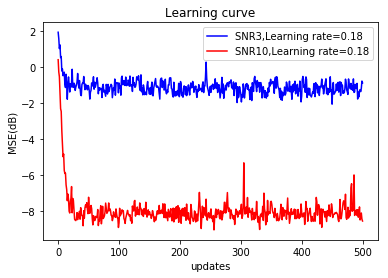

In [14]:
step3= 0.18
w_10=np.zeros((600,501,3))
err_10=np.zeros((600,501))
w_3=np.zeros((600,501,3))
err_3=np.zeros((600,501))
for i in range(600):
    w_10[i],err_10[i]=LMS(matched_10_v[i],matched_10_z[i],step3)
    w_3[i],err_3[i]=LMS(matched_3_v[i],matched_3_z[i],step3)
err_10_average=10*np.log10(np.average(err_10,axis=0))
err_3_average=10*np.log10(np.average(err_3,axis=0))
plt.figure()
plt.plot(err_3_average,c='b',label='SNR3,Learning rate=0.18')
plt.plot(err_10_average,c='r',label='SNR10,Learning rate=0.18')
plt.xlabel('updates')
plt.ylabel('MSE(dB)')
plt.legend()
plt.title('Learning curve')

Text(0.5,1,'Learning curve')

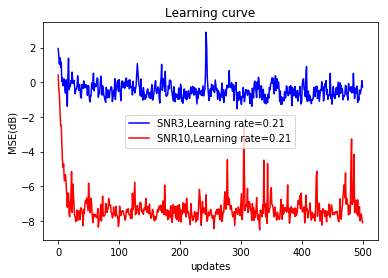

In [15]:
step3= 0.21
w_10=np.zeros((600,501,3))
err_10=np.zeros((600,501))
w_3=np.zeros((600,501,3))
err_3=np.zeros((600,501))
for i in range(600):
    w_10[i],err_10[i]=LMS(matched_10_v[i],matched_10_z[i],step3)
    w_3[i],err_3[i]=LMS(matched_3_v[i],matched_3_z[i],step3)
err_10_average=10*np.log10(np.average(err_10,axis=0))
err_3_average=10*np.log10(np.average(err_3,axis=0))
plt.figure()
plt.plot(err_3_average,c='b',label='SNR3,Learning rate=0.21')
plt.plot(err_10_average,c='r',label='SNR10,Learning rate=0.21')
plt.xlabel('updates')
plt.ylabel('MSE(dB)')
plt.legend()
plt.title('Learning curve')

From the image above, we can find that the largest eta should be 0.2

# 3-3

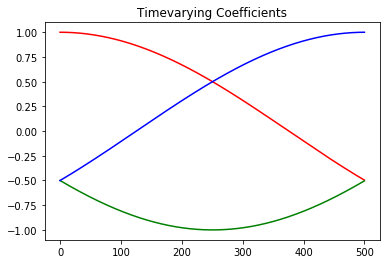

In [7]:
plt.figure()
plt.plot(timevarying_coefficents[:,0],color='r')
plt.plot(timevarying_coefficents[:,1],color='g')
plt.plot(timevarying_coefficents[:,2],color='b')
plt.title('Timevarying Coefficients')
plt.show()

Learning rate set to 0.08

Text(0.5,1,'LMS output')

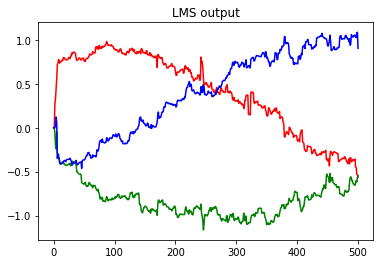

In [11]:
step = 0.08
w_tv, err_tv = LMS(timevarying_v, timevarying_z, step)
plt.figure()
plt.plot(w_tv[:,0],color='r')
plt.plot(w_tv[:,1],color='g')
plt.plot(w_tv[:,2],color='b')
plt.title('LMS output')

learning rate set to 0.12

Text(0.5,1,'LMS output')

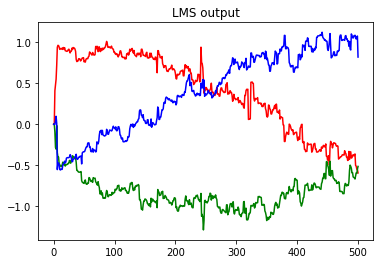

In [20]:
step = 0.12
w_tv, err_tv = LMS(timevarying_v, timevarying_z, step)
plt.figure()
plt.plot(w_tv[:,0],color='r')
plt.plot(w_tv[:,1],color='g')
plt.plot(w_tv[:,2],color='b')
plt.title('LMS output')

learning rate set to 0.03

Text(0.5,1,'LMS output')

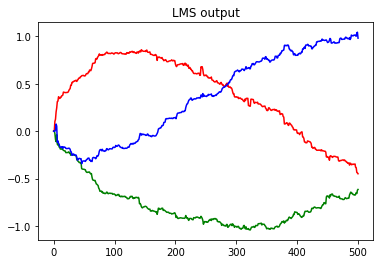

In [18]:
step = 0.03
w_tv, err_tv = LMS(timevarying_v, timevarying_z, step)
plt.figure()
plt.plot(w_tv[:,0],color='r')
plt.plot(w_tv[:,1],color='g')
plt.plot(w_tv[:,2],color='b')
plt.title('LMS output')

# 3-4

learning rate set to 0.03

Text(0.5,1,'Learning curve')

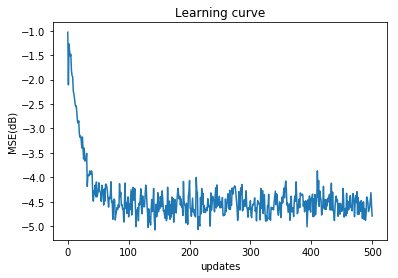

In [21]:
step5=0.03
w_mm=np.zeros((600,501,3))
err_mm=np.zeros((600,501))
for i in range(600):
    w_mm[i], err_mm[i] = LMS(mismatched_v[i], mismatched_y[i], step5)
err_mm_average=10*np.log10(np.average(err_mm,axis=0))
plt.figure()
plt.plot(err_mm_average)
plt.xlabel('updates')
plt.ylabel('MSE(dB)')
plt.title('Learning curve')

In [22]:
print(np.average(err_mm,axis=0)[-1])

0.33161264181386146


learning rate set to 0.01

Text(0.5,1,'Learning curve')

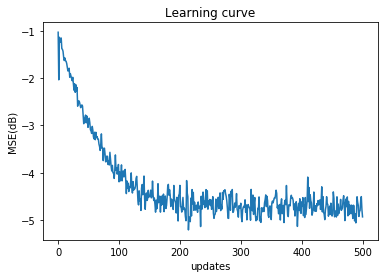

In [25]:
step5=0.01
w_mm=np.zeros((600,501,3))
err_mm=np.zeros((600,501))
for i in range(600):
    w_mm[i], err_mm[i] = LMS(mismatched_v[i], mismatched_y[i], step5)
err_mm_average=10*np.log10(np.average(err_mm,axis=0))
plt.figure()
plt.plot(err_mm_average)
plt.xlabel('updates')
plt.ylabel('MSE(dB)')
plt.title('Learning curve')

In [26]:
print(np.average(err_mm,axis=0)[-1])

0.32126696572453606


# 3-4-b

In [29]:
print(mismatched_y[0].shape)
print(mismatched_v[0].shape)
print(mismatched_y[0, None].shape)
print(mismatched_v[0, 0].shape)

(501,)
(501, 3)
(1, 501)
(3,)


In [27]:
rn_head = np.zeros((600,501,3))
for i in range(600):
    rn_head[i] = mismatched_v[i] * mismatched_y[i, None].T

exp_rn = np.average(np.average(rn_head, axis=0), axis=0)

Rvn = np.zeros((600,501,3,3))
for i in range(600):
    for j in range(501):
        Rvn[i, j] = mismatched_v[i, j] * (mismatched_v[i, j].reshape(3, 1))

exp_Rvn = np.average(np.average(Rvn, axis=0), axis=0)

w = np.linalg.inv(exp_Rvn)@exp_rn


LLSE = np.zeros((600, 501))#E<||y-y_head||^2>
for i in range(600):
    for j in range(501):
        LLSE[i, j] = (mismatched_v[i, j] @ w) * (w.T @ (mismatched_v[i, j].reshape(3, 1))) \
            - 2 * (mismatched_v[i, j] @ w * mismatched_y[i, j]) \
            +  mismatched_y[i, j] * mismatched_y[i, j]
            
exp_LLSE = np.average(np.average(LLSE, axis=0), axis=0) 

In [28]:
print('R_vn:')
print(exp_Rvn)
print('r_n:')
print(exp_rn)
print('LLSE:')
print(exp_LLSE)

R_vn:
[[ 1.00045756e+00 -5.39002475e-04  1.86487799e-03]
 [-5.39002475e-04  9.98711657e-01 -6.55304895e-04]
 [ 1.86487799e-03 -6.55304895e-04  9.96783998e-01]]
r_n:
[0.401296   0.38678905 0.3700655 ]
LLSE:
0.3311129441273168


The theoretical LLSE is a little higher than that of LMS output(learning rate=0.01):0.32126696572453606.